In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('placement.csv',usecols=['cgpa','iq','placement'])

In [4]:
df2=pd.read_csv('placed.csv')

In [5]:
df2.shape

(1000, 3)

In [6]:
df2

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [7]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


<Axes: xlabel='cgpa', ylabel='Density'>

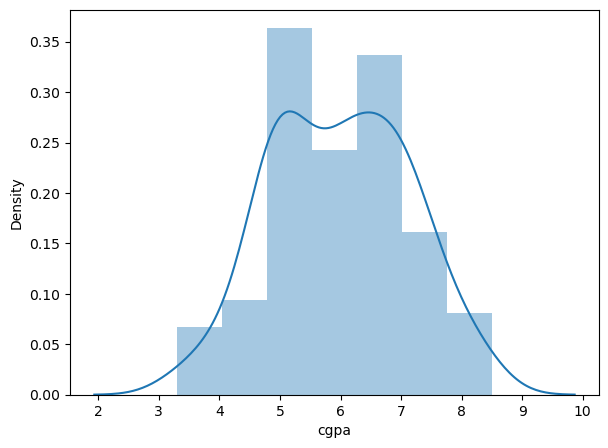

In [8]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df['cgpa'])

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

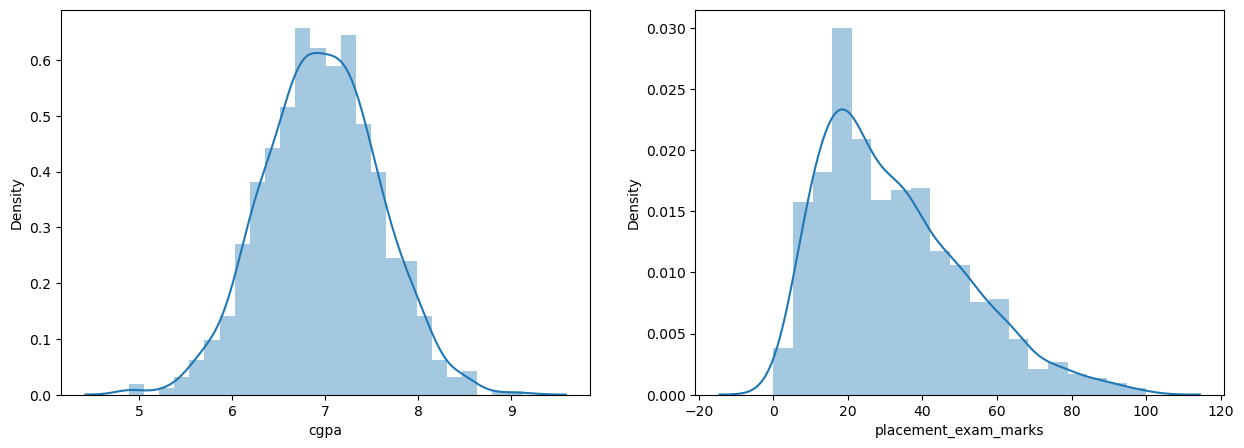

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.distplot(df2['cgpa'])
plt.subplot(122)
sns.distplot(df2['placement_exam_marks'])

In [10]:
#placement_exam_marks distribution appears right-skewed

In [11]:
df2['placement_exam_marks'].skew()*100

83.56419499466834

In [12]:
print('Mean of cgpa is',df2['cgpa'].mean())
print('Median of cgpa is',df2['cgpa'].median())
print('Mode of cgpa is',df2['cgpa'].mode().values)
print('Standard deviation of cgpa is',df2['cgpa'].std())
print("Min value of cgpa",df2['cgpa'].min())
print("Max value of cgpa",df2['cgpa'].max())

Mean of cgpa is 6.96124
Median of cgpa is 6.96
Mode of cgpa is [6.67 7.09 7.19 7.33 7.46]
Standard deviation of cgpa is 0.6158978751323894
Min value of cgpa 4.89
Max value of cgpa 9.12


In [13]:
#finding boundary values
print('Highest allowed',df2['placement_exam_marks'].mean()+3*(df2['placement_exam_marks'].std()))
print('Lowest allowed',df2['placement_exam_marks'].mean()-3*(df2['placement_exam_marks'].std()))

Highest allowed 89.61746701676324
Lowest allowed -25.167467016763247


In [14]:
#finding boundary values
print('Highest allowed',df2['cgpa'].mean()+3*(df2['cgpa'].std()))
print('Lowest allowed',df2['cgpa'].mean()-3*(df2['cgpa'].std()))

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [15]:
#finding the outliers
df2[(df2['cgpa']>8.808933625397168)| (df2['cgpa']<5.113546374602832)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


**TRIMMING**

In [17]:
new_df=df2[(df2['cgpa']<8.808933625397168)& (df2['cgpa']>5.113546374602832)]
new_df.shape

(995, 3)

In [19]:
#Calculating z-score
df2['cgpa_z_score']=((df2['cgpa']-df2['cgpa'].mean())/df2['cgpa'].std())

In [20]:
df2.head()

,cgpa,placement_exam_marks,placed,cgpa_z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [28]:
# Trimming 
new_df = df2[(df2['cgpa_z_score'] < 3) & (df2['cgpa_z_score'] > -3)]

In [29]:
new_df.shape

(995, 4)

**CAPPING**

In [36]:
upper_limit=df2['cgpa'].mean()+3*(df2['cgpa'].std())
lower_limit=df2['cgpa'].mean()-3*(df2['cgpa'].std())

In [37]:
lower_limit

5.113546374602832

In [39]:
df2['cgpa']=np.where(df2['cgpa']>upper_limit,upper_limit,(np.where(df2['cgpa']<lower_limit,lower_limit,df2['cgpa'])))

In [41]:
df2.shape

(1000, 4)

In [42]:
df2.describe()

,cgpa,placement_exam_marks,placed,cgpa_z_score
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.474376e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00
